In [2]:
!kaggle datasets download -d itsnobita/religious-books-islam-and-christanity

100%|████████████████████████████████████████| 697k/697k [00:00<00:00, 1.82MB/s]
100%|████████████████████████████████████████| 697k/697k [00:00<00:00, 1.82MB/s]


In [3]:
!unzip religious-books-islam-and-christanity.zip -d data_input

Archive:  religious-books-islam-and-christanity.zip
  inflating: data_input/books_Christanity.csv  
  inflating: data_input/books_Islam.csv  


In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

In [48]:
df_islam = pd.read_csv('./data_input/books_Islam.csv')
df_christ = pd.read_csv('./data_input/books_Christanity.csv')

In [49]:
df_islam.head()

,title,author,description,genres,pages,rating
0,القرآن الكريم,Anonymous,The Quran (English pronunciation: /kɔrˈɑːn/; A...,"{'Religion', 'Reference', 'Spirituality', 'Isl...","604 pages, Hardcover",4.38
1,Muhammad: His Life Based on the Earliest Sources,Martin Lings,Martin Lings’ biography of Muhammad is an inte...,"{'Religion', 'Spirituality', 'History', 'Islam...","384 pages, Paperback",4.57
2,الرحيق المختوم,Safiur Rahman Mubarakpuri,الرحيق المختومبحث في السيرة النبوية.تأليف: الش...,"{'Religion', 'Spirituality', 'History', 'Unfin...","498 pages, Hardcover",4.60
3,Destiny Disrupted: A History of the World Thro...,Tamim Ansary,We in the west share a common narrative of wor...,"{'Religion', 'Audiobook', 'World History', 'Hi...","416 pages, Kindle Edition",4.39
4,Reclaim Your Heart: Personal Insights on Break...,Yasmin Mogahed,Many of us live our lives entrapped by the sam...,"{'Psychology', 'Religion', 'Self Help', 'Spiri...","142 pages, Paperback",4.41


In [50]:
df_christ.head()

,title,author,description,genres,pages,rating
0,Mere Christianity,C.S. Lewis,Mere Christianity is C.S. Lewis's forceful and...,"{'Theology', 'Christian', 'Religion', 'Classic...","98 pages, Kindle Edition",4.35
1,The Screwtape Letters,C.S. Lewis,The Screwtape Letters by C.S. Lewis is a clas...,"{'Theology', 'Religion', 'Fantasy', 'Classics'...","222 pages, Kindle Edition",4.26
2,The Great Divorce,C.S. Lewis,Alternative cover for ISBN: 978-0-00-746123-3C...,"{'Theology', 'Religion', 'Fantasy', 'Classics'...","146 pages, Paperback",4.30
3,Confessions,Augustine of Hippo,Augustine's Confessions is one of the most inf...,"{'Theology', 'Christian', 'Religion', 'Classic...","341 pages, Paperback",3.95
4,The Problem of Pain,C.S. Lewis,For centuries people have been tormented by on...,"{'Theology', 'Christian', 'Religion', 'Christi...","162 pages, Paperback",4.12


In [51]:
df_islam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        740 non-null    object 
 1   author       740 non-null    object 
 2   description  736 non-null    object 
 3   genres       740 non-null    object 
 4   pages        738 non-null    object 
 5   rating       740 non-null    float64
dtypes: float64(1), object(5)
memory usage: 34.8+ KB


In [52]:
df_christ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        792 non-null    object 
 1   author       792 non-null    object 
 2   description  791 non-null    object 
 3   genres       792 non-null    object 
 4   pages        792 non-null    object 
 5   rating       792 non-null    float64
dtypes: float64(1), object(5)
memory usage: 37.2+ KB


In [53]:
# check for null values
df_null_islam = df_islam.isnull().sum()
df_null_christ = df_christ.isnull().sum()

# Define a maximum width for formatting
max_width = max(len("Total of Null Values in Islam DF:"), len("Total of null Values in Christ DF:"))

print(f'{f"Total of Null Values in Islam DF:":<{max_width}}\n\n{df_null_islam}\n')
print(f'{f"Total of null Values in Christ DF:":<{max_width}}\n\n{df_null_christ}\n')


Total of Null Values in Islam DF: 

title          0
author         0
description    4
genres         0
pages          2
rating         0
dtype: int64

Total of null Values in Christ DF:

title          0
author         0
description    1
genres         0
pages          0
rating         0
dtype: int64



In [54]:
# check for duplicate values
df_islam.duplicated().sum()

0

In [55]:
df_christ.duplicated().sum()

0

In [57]:
df_islam['page_number'] = df_islam['pages'].str.extract('(\d+) pages')
df_islam.head()

,title,author,description,genres,pages,rating,page_number
0,القرآن الكريم,Anonymous,The Quran (English pronunciation: /kɔrˈɑːn/; A...,"{'Religion', 'Reference', 'Spirituality', 'Isl...","604 pages, Hardcover",4.38,604
1,Muhammad: His Life Based on the Earliest Sources,Martin Lings,Martin Lings’ biography of Muhammad is an inte...,"{'Religion', 'Spirituality', 'History', 'Islam...","384 pages, Paperback",4.57,384
2,الرحيق المختوم,Safiur Rahman Mubarakpuri,الرحيق المختومبحث في السيرة النبوية.تأليف: الش...,"{'Religion', 'Spirituality', 'History', 'Unfin...","498 pages, Hardcover",4.60,498
3,Destiny Disrupted: A History of the World Thro...,Tamim Ansary,We in the west share a common narrative of wor...,"{'Religion', 'Audiobook', 'World History', 'Hi...","416 pages, Kindle Edition",4.39,416
4,Reclaim Your Heart: Personal Insights on Break...,Yasmin Mogahed,Many of us live our lives entrapped by the sam...,"{'Psychology', 'Religion', 'Self Help', 'Spiri...","142 pages, Paperback",4.41,142


In [58]:
df_islam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        740 non-null    object 
 1   author       740 non-null    object 
 2   description  736 non-null    object 
 3   genres       740 non-null    object 
 4   pages        738 non-null    object 
 5   rating       740 non-null    float64
 6   page_number  722 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.6+ KB


In [59]:
# total pages of islam books
df_islam['page_number'] = df_islam['page_number'].fillna(0).astype(int)
df_islam['page_number'].sum()


249136

In [62]:
# mean pages of islam books 
df_islam['page_number'].mean().round()


337.0

In [63]:
df_christ['page_number'] = df_christ['pages'].str.extract('(\d+) pages')
df_christ.head()

,title,author,description,genres,pages,rating,page_number
0,Mere Christianity,C.S. Lewis,Mere Christianity is C.S. Lewis's forceful and...,"{'Theology', 'Christian', 'Religion', 'Classic...","98 pages, Kindle Edition",4.35,98
1,The Screwtape Letters,C.S. Lewis,The Screwtape Letters by C.S. Lewis is a clas...,"{'Theology', 'Religion', 'Fantasy', 'Classics'...","222 pages, Kindle Edition",4.26,222
2,The Great Divorce,C.S. Lewis,Alternative cover for ISBN: 978-0-00-746123-3C...,"{'Theology', 'Religion', 'Fantasy', 'Classics'...","146 pages, Paperback",4.30,146
3,Confessions,Augustine of Hippo,Augustine's Confessions is one of the most inf...,"{'Theology', 'Christian', 'Religion', 'Classic...","341 pages, Paperback",3.95,341
4,The Problem of Pain,C.S. Lewis,For centuries people have been tormented by on...,"{'Theology', 'Christian', 'Religion', 'Christi...","162 pages, Paperback",4.12,162


In [64]:
# total pages of christ books
df_christ['page_number'] = df_christ['page_number'].fillna(0).astype(int)
df_christ['page_number'].sum()

237064

In [65]:
df_christ['page_number'].mean().round()

299.0

In [66]:
df_islam['author'].unique()

array(['Anonymous', 'Martin Lings', 'Safiur Rahman Mubarakpuri',
       'Tamim Ansary', 'Yasmin Mogahed', 'Karen Armstrong',
       'Ayaan Hirsi Ali', 'Tariq Ramadan', 'A. Helwa', 'Lesley Hazleton',
       'Hamza Yusuf', 'عائض القرني', 'Malcolm X', 'Amina Wadud',
       'Jonathan A.C. Brown', 'Firas Alkhateeb', 'Muhammad Asad',
       'Geraldine Brooks', 'Asma Barlas', 'Khaled Hosseini',
       'Nabeel Qureshi', 'Leila Ahmed', 'ابن كثير', 'Seyyed Hossein Nasr',
       'B.B. Abdulla', 'G. Willow Wilson', 'Alija Izetbegović',
       'Malala Yousafzai', 'محمد علي الهاشمي', 'Omar Suleiman',
       'Charles Le Gai Eaton', 'Ibn Khaldun', 'Marshall G.S. Hodgson',
       'Carla Power', 'Mohammed Faris', 'Bernard Lewis', 'Azar Nafisi',
       'Abu Hamid al-Ghazali', 'Rumi', 'Edward W. Said',
       'الحبيب عبد الله بن علوي الحداد الحضرمي الشافعي', 'Muhammad Iqbal',
       'Nouman Ali Khan', 'Attar of Nishapur', 'Tom Holland',
       'Omar Saif Ghobash', 'Sam Harris', 'Kecia Ali', 'Irshad Manji'

In [67]:
df_islam['rating'].mean().round(2)

4.13

In [68]:
df_christ['rating'].mean().round(2)

4.2

In [83]:
# find the most common word on the title of the books using wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords


english_stopwords = set(stopwords.words('english'))
arabic_stopwords = set(stopwords.words('arabic'))  # i guess arabic wont work for this type of sentence القرآن الكريم and so on.

stopwords = english_stopwords.union(arabic_stopwords)

# stopwords = set(stopwords.words('english', 'arabic'))

In [84]:
title_islam = df_islam['title'].str.lower().str.cat(sep=' ')
title_islam

'القرآن الكريم muhammad: his life based on the earliest sources الرحيق المختوم destiny disrupted: a history of the world through islamic eyes reclaim your heart: personal insights on breaking free from life\'s shackles islam: a short history infidel in the footsteps of the prophet: lessons from the life of muhammad secrets of divine love: a spiritual journey into the heart of islam after the prophet: the epic story of the shia-sunni split in islam purification of the heart: signs, symptoms and cures of the spiritual diseases of the heart لا تحزن muhammad: a biography of the prophet a history of god: the 4,000-year quest of judaism, christianity, and islam the autobiography of malcolm x qur\'an and woman: rereading the sacred text from a woman\'s perspective misquoting muhammad: the challenge and choices of interpreting the prophet\'s legacy lost islamic history: reclaiming muslim civilisation from the past the road to mecca nine parts of desire: the hidden world of islamic women "belie

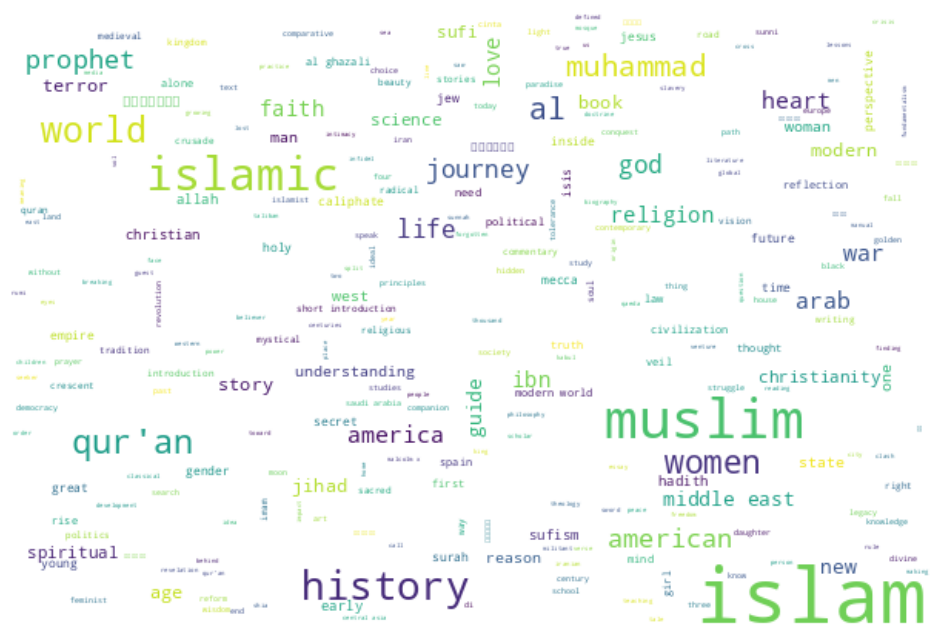

In [85]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(title_islam)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [86]:
title_christ = df_christ['title'].str.lower().str.cat(sep=' ')
title_christ

'mere christianity the screwtape letters the great divorce confessions the problem of pain the pilgrim\'s progress a grief observed the cost of discipleship blue like jazz: nonreligious thoughts on christian spirituality the purpose driven life: what on earth am i here for? surprised by joy: the shape of my early life the shack the abolition of man the holy bible: king james version the lion, the witch and the wardrobe the hiding place: the triumphant true story of corrie ten boom knowing god the imitation of christ the weight of glory radical: taking back your faith from the american dream the prodigal god: recovering the heart of the christian faith the practice of the presence of god desiring god: meditations of a christian hedonist wild at heart: discovering the secret of a man\'s soul zealot: the life and times of jesus of nazareth the meaning of marriage: facing the complexities of commitment with the wisdom of god forgotten god: reversing our tragic neglect of the holy spirit li

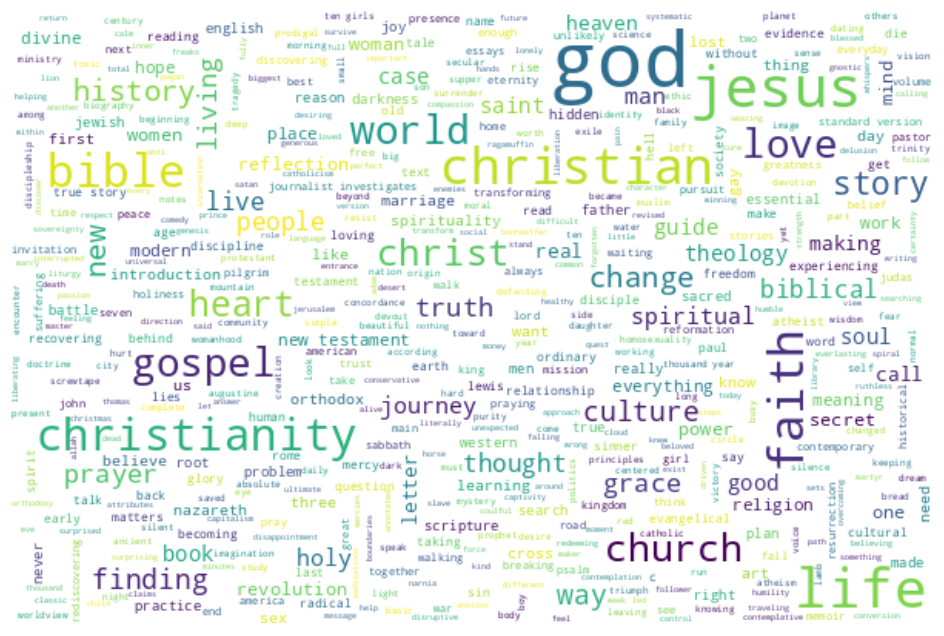

In [87]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                        width = 600, height = 400,
                        background_color="white").generate(title_christ)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Merging the two datasets


In [93]:
# merge the two dataframe

df_merge = pd.concat([df_islam, df_christ], axis=0)
df_merge = df_merge.reset_index(drop=True)
df_merge.head()

,title,author,description,genres,pages,rating,page_number
0,القرآن الكريم,Anonymous,The Quran (English pronunciation: /kɔrˈɑːn/; A...,"{'Religion', 'Reference', 'Spirituality', 'Isl...","604 pages, Hardcover",4.38,604
1,Muhammad: His Life Based on the Earliest Sources,Martin Lings,Martin Lings’ biography of Muhammad is an inte...,"{'Religion', 'Spirituality', 'History', 'Islam...","384 pages, Paperback",4.57,384
2,الرحيق المختوم,Safiur Rahman Mubarakpuri,الرحيق المختومبحث في السيرة النبوية.تأليف: الش...,"{'Religion', 'Spirituality', 'History', 'Unfin...","498 pages, Hardcover",4.60,498
3,Destiny Disrupted: A History of the World Thro...,Tamim Ansary,We in the west share a common narrative of wor...,"{'Religion', 'Audiobook', 'World History', 'Hi...","416 pages, Kindle Edition",4.39,416
4,Reclaim Your Heart: Personal Insights on Break...,Yasmin Mogahed,Many of us live our lives entrapped by the sam...,"{'Psychology', 'Religion', 'Self Help', 'Spiri...","142 pages, Paperback",4.41,142


In [94]:
df_merge.info() #1532 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1532 non-null   object 
 1   author       1532 non-null   object 
 2   description  1527 non-null   object 
 3   genres       1532 non-null   object 
 4   pages        1530 non-null   object 
 5   rating       1532 non-null   float64
 6   page_number  1532 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 83.9+ KB


In [95]:
# Get books with the highest rating

df_merge.sort_values(by='rating', ascending=False).head(10)


,title,author,description,genres,pages,rating,page_number
597,Knowledge and Wisdom,الحبيب عبد الله بن علوي الحداد الحضرمي الشافعي,This volume contains 40 short essays that revo...,{'Islam'},"144 pages, Paperback",4.85,144
608,The Prophetic Invocations,الحبيب عبد الله بن علوي الحداد الحضرمي الشافعي,The second edition of a very popular book that...,"{'Religion', 'Islam'}","152 pages, Paperback",4.84,152
734,Your Lord Has Not Forsaken You: Addressing The...,Najwa Awad,Trauma is more common than you think. Well ove...,"{'Islam', 'Nonfiction'}","478 pages, ebook",4.82,478
144,Lessons from Surah al-Kahf,Abu Ammaar Yasir Qadhi,"The Qur’an is full of parables. Each one, when...","{'Islam', 'Religion'}",Kindle Edition,4.80,0
184,The Simple Seerah: The Story of The Prophet Mu...,Asim Khan,The seerah of the Prophet Muhammad (peace be u...,"{'Islam', 'Middle Grade', 'Nonfiction', 'Relig...","142 pages, Paperback",4.78,142
637,The Sealed Nectar Biography Of The Noble Proph...,Saifiur-Rahman Al-Mubarakpuri,NaN,{'Islam'},Hardcover,4.78,0
379,The Crowning Venture: Inspiration from Women W...,Saadia Mian,If you’ve ever sighed wistfully upon hearing o...,"{'Spirituality', 'Islam', 'Nonfiction'}","156 pages, Paperback",4.77,156
153,Angels in Your Presence,Omar Suleiman,"Throughout your existence, there are angels in...","{'Islam', 'Faith', 'Nonfiction', 'Religion'}","168 pages, Hardcover",4.77,168
45,Prayers of the Pious,Omar Suleiman,This inspirational collection of prayers and r...,"{'Religion', 'Spirituality', 'Muslims', 'Islam...","128 pages, Hardcover",4.74,128
257,Lessons from Surah Yusuf,Abu Ammaar Yasir Qadhi,"Surah Yusuf, a chapter of the Qur'an (Koran), ...","{'Islam', 'Nonfiction', 'Religion'}","256 pages, Hardcover",4.74,256


In [96]:
# Get books with the lowest rating

df_merge.sort_values(by='rating', ascending=True).head(10)

,title,author,description,genres,pages,rating,page_number
1341,The Late Great Planet Earth,Hal Lindsey,The impact of The Late Great Planet Earth cann...,"{'Nonfiction', 'Christian Non Fiction', 'Theol...","192 pages, Paperback",3.18,192
442,The Convert: A Tale of Exile and Extremism,Deborah Baker,"\r\nA spellbinding story of renunciation, conv...","{'Pakistan', 'Nonfiction', 'Memoir', 'Religion...","224 pages, Hardcover",3.18,224
709,Sexuality In Islam,Abdelwahab Bouhdiba,"In this classic work, Abdelwahab Bouhdiba asse...","{'Islam', 'Sexuality', 'Religion', 'Nonfiction'}","288 pages, Paperback",3.21,288
119,Islam: A Very Short Introduction,Malise Ruthven,"Islam features widely in the news, often in it...","{'Islam', 'Nonfiction', 'Religion', 'Theology'...","161 pages, Paperback",3.25,161
250,Girls of Riyadh,Rajaa Alsanea,When Rajaa Alsanea boldly chose to open up the...,"{'Islam', 'Feminism', 'Novels', 'Romance', 'Ch...","320 pages, Paperback",3.26,320
241,Islamic History: A Very Short Introduction,Adam J. Silverstein,Does history matter? This book argues not that...,"{'Politics', 'Islam', 'Nonfiction', 'Religion'...","157 pages, Paperback",3.27,157
121,The Koran: A Very Short Introduction,Michael A. Cook,The Koran has constituted a remarkably resilie...,"{'Islam', 'Mythology', 'Nonfiction', 'Religion...","176 pages, Paperback",3.38,176
413,Introducing Islam: A Graphic Guide,Ziauddin Sardar,Islamic culture has produced some of the fines...,"{'History', 'Comics', 'Nonfiction', 'Philosoph...","371 pages, Kindle Edition",3.43,371
228,A History of Islam in 21 Women,Hossein Kamaly,"Beginning in seventh-century Mecca and Medina,...","{'Islam', 'Nonfiction', 'Feminism', 'Womens', ...","304 pages, Kindle Edition",3.44,304
368,Wahhabism: A Critical Essay,Hamid Algar,"Wahhabism, a peculiar interpretation of Islami...","{'Islam', 'Politics', 'Nonfiction', 'Religion'...","104 pages, Paperback",3.46,104


In [97]:
# add column called edition_info 

df_merge['edition_info'] = df_merge['pages'].str.extract(r'pages, (.+)$')
df_merge.head()

,title,author,description,genres,pages,rating,page_number,edition_info
0,القرآن الكريم,Anonymous,The Quran (English pronunciation: /kɔrˈɑːn/; A...,"{'Religion', 'Reference', 'Spirituality', 'Isl...","604 pages, Hardcover",4.38,604,Hardcover
1,Muhammad: His Life Based on the Earliest Sources,Martin Lings,Martin Lings’ biography of Muhammad is an inte...,"{'Religion', 'Spirituality', 'History', 'Islam...","384 pages, Paperback",4.57,384,Paperback
2,الرحيق المختوم,Safiur Rahman Mubarakpuri,الرحيق المختومبحث في السيرة النبوية.تأليف: الش...,"{'Religion', 'Spirituality', 'History', 'Unfin...","498 pages, Hardcover",4.60,498,Hardcover
3,Destiny Disrupted: A History of the World Thro...,Tamim Ansary,We in the west share a common narrative of wor...,"{'Religion', 'Audiobook', 'World History', 'Hi...","416 pages, Kindle Edition",4.39,416,Kindle Edition
4,Reclaim Your Heart: Personal Insights on Break...,Yasmin Mogahed,Many of us live our lives entrapped by the sam...,"{'Psychology', 'Religion', 'Self Help', 'Spiri...","142 pages, Paperback",4.41,142,Paperback


In [98]:
df_merge['edition_info'].unique()

array(['Hardcover', 'Paperback', 'Kindle Edition',
       'Mass Market Paperback', 'Unknown Binding', nan, 'ebook',
       'hardcover', 'paperback', 'Nook', 'Audio CD', 'Logos'],
      dtype=object)

In [99]:
# delete pages column

df_merge.drop(columns=['pages'], inplace=True)
df_merge.head()

,title,author,description,genres,rating,page_number,edition_info
0,القرآن الكريم,Anonymous,The Quran (English pronunciation: /kɔrˈɑːn/; A...,"{'Religion', 'Reference', 'Spirituality', 'Isl...",4.38,604,Hardcover
1,Muhammad: His Life Based on the Earliest Sources,Martin Lings,Martin Lings’ biography of Muhammad is an inte...,"{'Religion', 'Spirituality', 'History', 'Islam...",4.57,384,Paperback
2,الرحيق المختوم,Safiur Rahman Mubarakpuri,الرحيق المختومبحث في السيرة النبوية.تأليف: الش...,"{'Religion', 'Spirituality', 'History', 'Unfin...",4.60,498,Hardcover
3,Destiny Disrupted: A History of the World Thro...,Tamim Ansary,We in the west share a common narrative of wor...,"{'Religion', 'Audiobook', 'World History', 'Hi...",4.39,416,Kindle Edition
4,Reclaim Your Heart: Personal Insights on Break...,Yasmin Mogahed,Many of us live our lives entrapped by the sam...,"{'Psychology', 'Religion', 'Self Help', 'Spiri...",4.41,142,Paperback


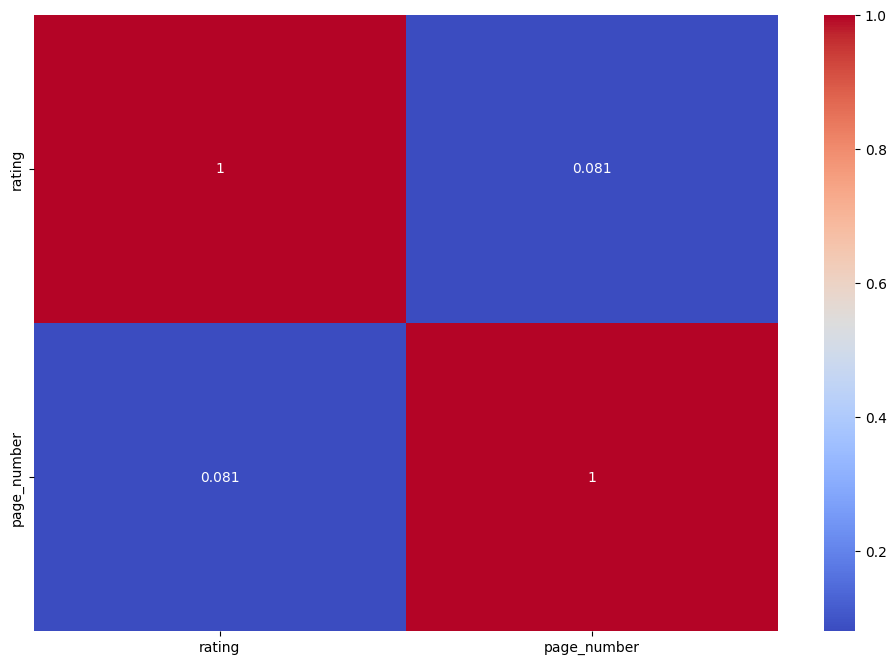

In [102]:
# find correlation between all the columns using heatmap

import seaborn as sns

numeric_columns = ['rating', 'page_number']

# Create a new DataFrame with only the numeric columns
df_numeric = df_merge[numeric_columns]

# Calculate the correlation matrix
corr = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [103]:
# make recomendation algorithm using cosine similarity

# Define a function that accepts a title and returns the index of the movie
def get_index_from_title(title):
    return df_merge[df_merge['title'] == title].index[0]

# Define a function that accepts a index and returns the title of the book
def get_title_from_index(index):
    return df_merge.iloc[index]['title']

# Define a function that accepts a index and returns the author of the book
def get_author_from_index(index):
    return df_merge.iloc[index]['author']

# Define a function that accepts a index and returns the rating of the book
def get_rating_from_index(index):
    return df_merge.iloc[index]['rating']


In [113]:
df_merge['title'].isnull().sum()

0

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import fuzz


# Handle missing values in the 'description' column
df_merge['description'] = df_merge['description'].fillna('')  # Replace NaN with an empty string

# Use CountVectorizer to convert text data into a numerical format (e.g., TF-IDF)
# count_vectorizer = CountVectorizer()
# count_matrix = count_vectorizer.fit_transform(df_merge['description'])

# Calculate cosine similarity between items (books)
# cosine_sim = cosine_similarity(count_matrix, count_matrix)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['description'])

# Calculate cosine similarity between items (books)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Define a function to get book recommendations based on title and number of recommendations
def get_book_recommendations(title, num_recommendations=5):
    try:
        index = get_index_from_title(title)
    except IndexError:
        print(f"Book '{title}' not found in the dataset.")
        return []

    similar_books = list(enumerate(cosine_sim[index]))
    similar_books = sorted(similar_books, key=lambda x: x[1], reverse=True)
    similar_books = similar_books[1:num_recommendations+1]  # Exclude the book itself
    recommendations = [get_title_from_index(book[0]) for book in similar_books]
    return recommendations

# Example usage:
recommended_books = get_book_recommendations('Christianity')
print(f'Because you read "{get_title_from_index(get_index_from_title("Christianity"))}":\n')


In [117]:
def get_closest_matching_title(input_title):
    title_scores = [(title, fuzz.ratio(input_title, title)) for title in df_merge['title']]
    title_scores = sorted(title_scores, key=lambda x: x[1], reverse=True)
    return title_scores[0][0]

# Use the closest matching title for recommendations
input_title = 'Christianity'
closest_matching_title = get_closest_matching_title(input_title)

recommended_books = get_book_recommendations(closest_matching_title)
print(f'Recommended books based on "{closest_matching_title}":\n')
print(recommended_books)

Recommended books based on "Mere Christianity":

['Islam and the West', 'A History of Christianity: The First Three Thousand Years', 'Orthodoxy and the Religion of the Future', 'Wahhabism: A Critical Essay', 'Atheist Delusions: The Christian Revolution and Its Fashionable Enemies']
